In [1]:
#import libarries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read the dataset
sp = pd.read_csv('E:\kaggle\Brain Stock/healthcare-dataset-stroke-data.csv')

In [3]:
#Top 5 daatset
sp.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
#Datatypes
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
#information about statsistical 
sp.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
sp.shape

(5110, 12)

In [7]:
sp.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [8]:
import sys

from pandas_profiling import ProfileReport
s = ProfileReport(sp)
s.to_file(output_file = 'stroke.html')


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
sp = sp.drop(columns='id')

In [10]:
sp.shape

(5110, 11)

In [11]:
sp

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [12]:
sp.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [13]:
from sklearn.impute import SimpleImputer

mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
sp['bmi'] = pd.DataFrame(mean_imputer.fit_transform(sp[['bmi']]))

sp.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [14]:
sp.duplicated().sum()

0

In [15]:
sp['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [16]:
sp['hypertension'].value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

In [17]:
sp['heart_disease'].value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

In [18]:
sp['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [19]:
sp['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [20]:
sp['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [21]:
sp['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [22]:
sp['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

C:\Users\Sushri Supravat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

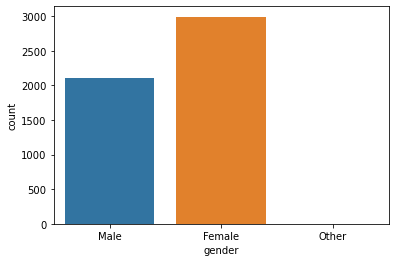

In [23]:
sns.countplot(sp.gender)

C:\Users\Sushri Supravat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hypertension', ylabel='count'>

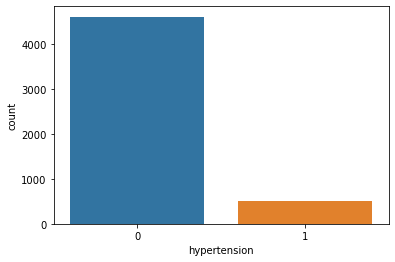

In [24]:
sns.countplot(sp.hypertension)

C:\Users\Sushri Supravat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='heart_disease', ylabel='count'>

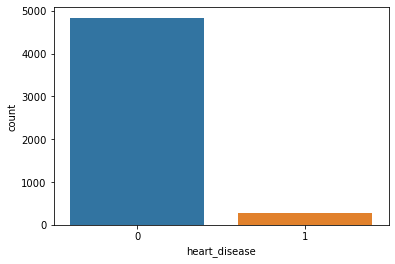

In [25]:
sns.countplot(sp.heart_disease)

C:\Users\Sushri Supravat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ever_married', ylabel='count'>

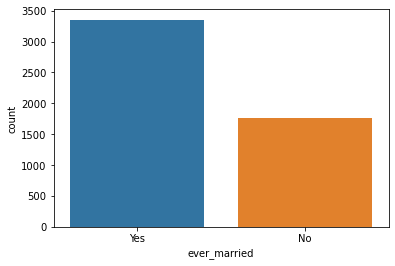

In [26]:
sns.countplot(sp.ever_married)

C:\Users\Sushri Supravat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='work_type', ylabel='count'>

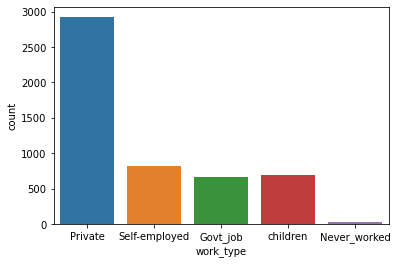

In [27]:
sns.countplot(sp.work_type)

C:\Users\Sushri Supravat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Residence_type', ylabel='count'>

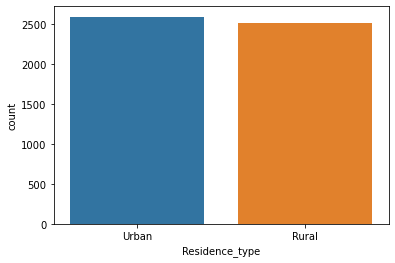

In [28]:
sns.countplot(sp.Residence_type)

C:\Users\Sushri Supravat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='smoking_status', ylabel='count'>

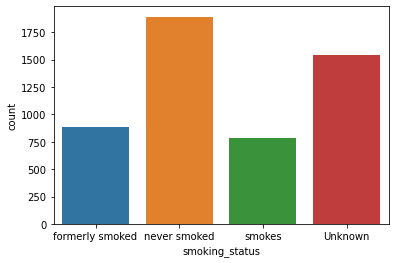

In [29]:
sns.countplot(sp.smoking_status)

C:\Users\Sushri Supravat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stroke', ylabel='count'>

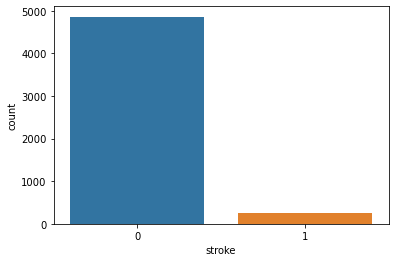

In [30]:
sns.countplot(sp.stroke)

C:\Users\Sushri Supravat\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

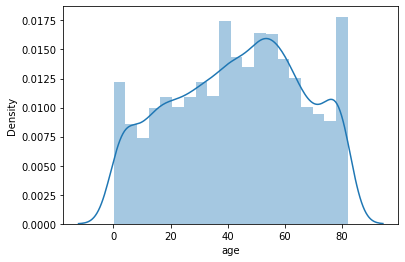

In [31]:
sns.distplot(sp.age)

C:\Users\Sushri Supravat\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='avg_glucose_level', ylabel='Density'>

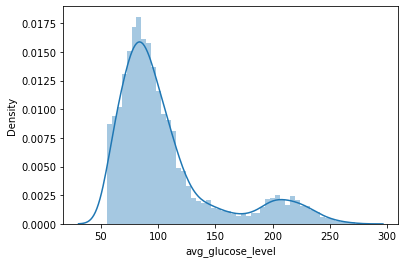

In [32]:
sns.distplot(sp.avg_glucose_level)

C:\Users\Sushri Supravat\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

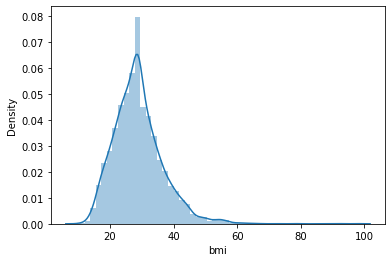

In [33]:
sns.distplot(sp.bmi)

In [34]:
cols = ['gender', 'ever_married', 'work_type' , 'Residence_type', 'smoking_status']

from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()


encoders = {column: lb for column in cols}

for column in cols:
    sp[column] = encoders[column].fit_transform(sp[column])

In [35]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int32  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int32  
 5   work_type          5110 non-null   int32  
 6   Residence_type     5110 non-null   int32  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int32  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int32(5), int64(3)
memory usage: 339.5 KB


In [36]:
sp

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


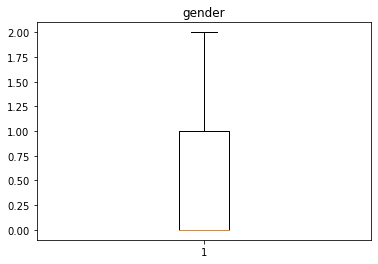

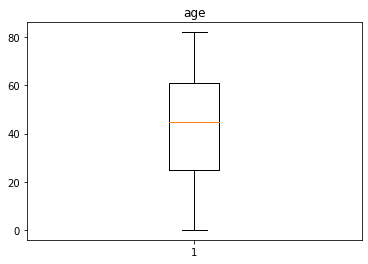

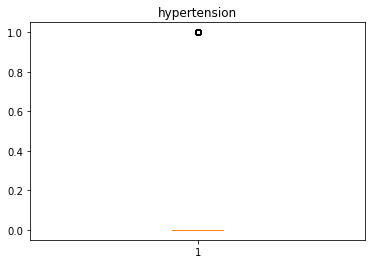

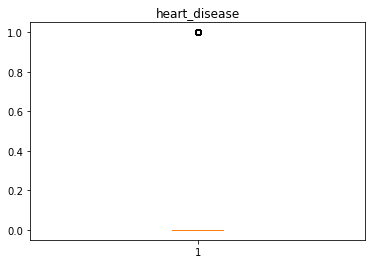

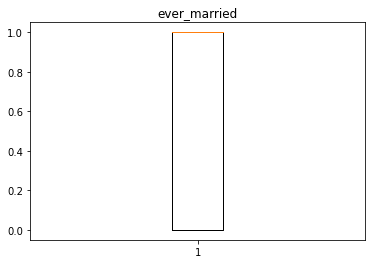

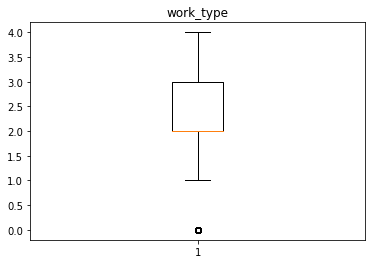

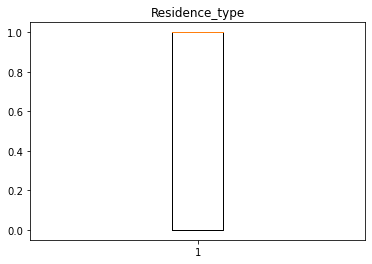

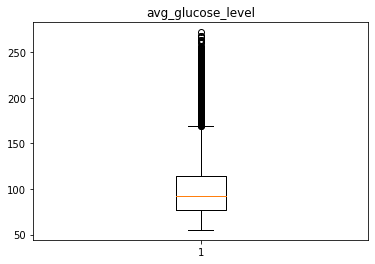

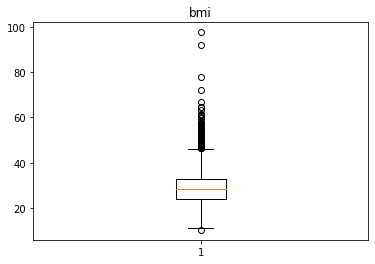

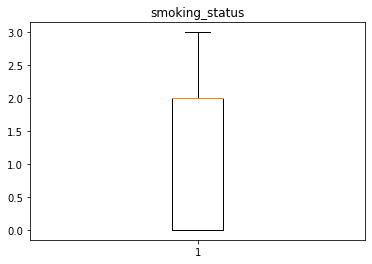

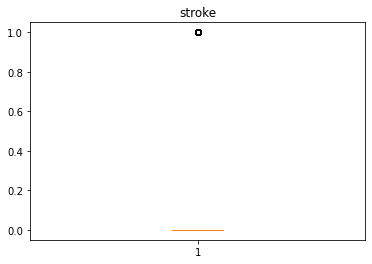

In [37]:
col = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke']

for i in col:
    plt.boxplot(sp[i]);
    plt.title(i);
    plt.show()

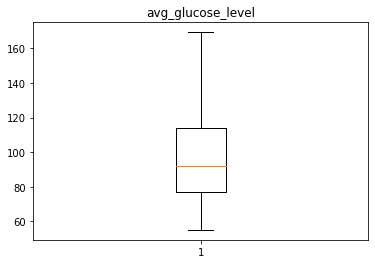

In [38]:
from feature_engine.outliers.winsorizer import Winsorizer

winsorizer = Winsorizer(capping_method ='iqr',
                       tail='both',
                       fold=1.5,
                       variables =['avg_glucose_level'])

c_t = winsorizer.fit_transform(sp[['avg_glucose_level']])

winsorizer.left_tail_caps_, winsorizer.right_tail_caps_

plt.boxplot(c_t.avg_glucose_level);plt.title('avg_glucose_level');plt.show()

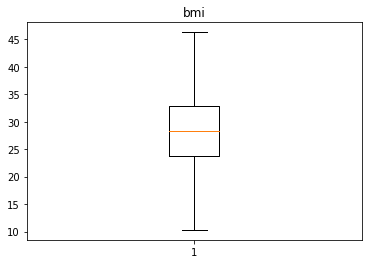

In [39]:
winsorizer = Winsorizer(capping_method = 'iqr',
                       tail = 'both',
                       fold = 1.5,
                       variables = ['bmi'])

b_t = winsorizer.fit_transform(sp[['bmi']])

winsorizer.left_tail_caps_, winsorizer.right_tail_caps_

plt.boxplot(b_t.bmi);plt.title('bmi');plt.show()

In [40]:
sp.var() == 0

gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                  False
smoking_status       False
stroke               False
dtype: bool

In [41]:
sp.skew()

gender               0.353012
age                 -0.137059
hypertension         2.715392
heart_disease        3.947244
ever_married        -0.657745
work_type           -0.308617
Residence_type      -0.032107
avg_glucose_level    1.572284
bmi                  1.076716
smoking_status      -0.039234
stroke               4.193284
dtype: float64

In [42]:
sp.kurtosis()

gender               -1.862882
age                  -0.991010
hypertension          5.375456
heart_disease        13.586052
ever_married         -1.567985
work_type             0.144290
Residence_type       -1.999752
avg_glucose_level     1.680479
bmi                   3.623061
smoking_status       -1.317830
stroke               15.589736
dtype: float64

In [43]:
#Predictors
X = sp.iloc[:, :-1]

#Target
y = sp.iloc[:, -1]

In [44]:
y.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [45]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X, y = sm.fit_resample(X,y)

In [46]:
y.value_counts()

1    4861
0    4861
Name: stroke, dtype: int64

C:\Users\Sushri Supravat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stroke', ylabel='count'>

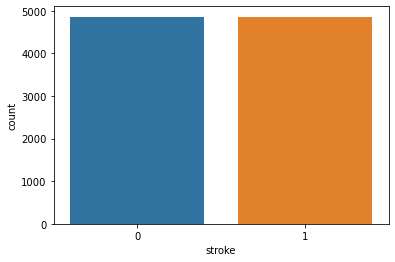

In [47]:
sns.countplot(y)

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [49]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [58]:
y_pred = knn.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9131105398457584


In [60]:
k_pred = knn.predict(X_train)

print(accuracy_score(y_train, k_pred))

0.9422656551369423


In [61]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))
print(classification_report(y_train, k_pred))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91       973
           1       0.87      0.97      0.92       972

    accuracy                           0.91      1945
   macro avg       0.92      0.91      0.91      1945
weighted avg       0.92      0.91      0.91      1945

              precision    recall  f1-score   support

           0       0.98      0.90      0.94      3888
           1       0.91      0.98      0.94      3889

    accuracy                           0.94      7777
   macro avg       0.94      0.94      0.94      7777
weighted avg       0.94      0.94      0.94      7777



In [52]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state = 0)
lr.fit(X_train, y_train)

C:\Users\Sushri Supravat\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [62]:
y_pred = lr.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

l_pred = lr.predict(X_train)

print(accuracy_score(y_train, l_pred))

0.8143958868894602
0.7995370965667995


In [63]:
from sklearn.metrics import classification_report

print(classification_report(y_pred, y_test))
print(classification_report(y_train, l_pred))

              precision    recall  f1-score   support

           0       0.78      0.83      0.81       914
           1       0.84      0.80      0.82      1031

    accuracy                           0.81      1945
   macro avg       0.81      0.82      0.81      1945
weighted avg       0.82      0.81      0.81      1945

              precision    recall  f1-score   support

           0       0.81      0.78      0.80      3888
           1       0.79      0.82      0.80      3889

    accuracy                           0.80      7777
   macro avg       0.80      0.80      0.80      7777
weighted avg       0.80      0.80      0.80      7777



In [64]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=2, min_samples_leaf=1, max_features=5, random_state=0)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_features=5, random_state=0)

In [69]:
y_pred = dt.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

dt_pred = dt.predict(X_train)

print(accuracy_score(y_train, dt_pred))

0.7876606683804627
0.796065320817796


In [70]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))
print(classification_report(y_train, dt_pred))

              precision    recall  f1-score   support

           0       0.80      0.77      0.79       973
           1       0.78      0.80      0.79       972

    accuracy                           0.79      1945
   macro avg       0.79      0.79      0.79      1945
weighted avg       0.79      0.79      0.79      1945

              precision    recall  f1-score   support

           0       0.80      0.78      0.79      3888
           1       0.79      0.81      0.80      3889

    accuracy                           0.80      7777
   macro avg       0.80      0.80      0.80      7777
weighted avg       0.80      0.80      0.80      7777



In [71]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth = 5, n_jobs = -1, random_state = 0)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, random_state=0)

In [72]:
y_pred = rfc.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred, y_test))

r_pred = dt.predict(X_train)

print(accuracy_score(y_train, r_pred))

0.8442159383033419
0.796065320817796


In [73]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))
print(classification_report(y_train, r_pred))

              precision    recall  f1-score   support

           0       0.90      0.78      0.83       973
           1       0.80      0.91      0.85       972

    accuracy                           0.84      1945
   macro avg       0.85      0.84      0.84      1945
weighted avg       0.85      0.84      0.84      1945

              precision    recall  f1-score   support

           0       0.80      0.78      0.79      3888
           1       0.79      0.81      0.80      3889

    accuracy                           0.80      7777
   macro avg       0.80      0.80      0.80      7777
weighted avg       0.80      0.80      0.80      7777



In [74]:
from sklearn.ensemble import GradientBoostingClassifier

gdc = GradientBoostingClassifier()
gdc.fit(X_train, y_train)

GradientBoostingClassifier()

In [75]:
y_pred = gdc.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

gb_pred = dt.predict(X_train)

print(accuracy_score(y_train, gb_pred))

0.8786632390745501
0.796065320817796


In [76]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))
print(classification_report(y_train, gb_pred))

              precision    recall  f1-score   support

           0       0.90      0.85      0.88       973
           1       0.86      0.90      0.88       972

    accuracy                           0.88      1945
   macro avg       0.88      0.88      0.88      1945
weighted avg       0.88      0.88      0.88      1945

              precision    recall  f1-score   support

           0       0.80      0.78      0.79      3888
           1       0.79      0.81      0.80      3889

    accuracy                           0.80      7777
   macro avg       0.80      0.80      0.80      7777
weighted avg       0.80      0.80      0.80      7777



In [77]:
import pickle

In [78]:
pickle.dump(knn, open('brain_stroke.pkl', 'wb'))

In [79]:
import session_info
session_info.show()